## Table of Contents

* [Data Import](#Data_Cleaning)
    * [Section 1.1](#section_1_1)
    * [Section 1.2](sSection_1_2)
* [Exploratory Data Analysis](#chapter2)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

# Data Import

In [36]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np 
import pandas as pd 
import seaborn as sns
import nltk

## Column Names And Data


* **description** -  textual description with details of the haunting.
* **location** - A more detailed description of the haunted place's location.
* **longitude** - The longitude of the location (geocoded dataset only).
* **latitude** -  	The latitude of the location (geocoded dataset only).
* **city** - The city of the haunted place.
* **city_longitude** -  The longitude of the city (geocoded dataset only).
* **city_latitude** -  The latitude of the city (geocoded dataset only).
* **state** - The state of the haunted place.
* **state_abbrev** - The abbreviated state.
* **country** -  The country of the haunted place. Currently only US.


In [37]:
haunt = pd.read_csv('haunted.csv')

In [38]:
haunt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10989 non-null  object 
 1   country         10992 non-null  object 
 2   description     10992 non-null  object 
 3   location        10989 non-null  object 
 4   state           10992 non-null  object 
 5   state_abbrev    10992 non-null  object 
 6   longitude       9731 non-null   float64
 7   latitude        9731 non-null   float64
 8   city_longitude  10963 non-null  float64
 9   city_latitude   10963 non-null  float64
dtypes: float64(4), object(6)
memory usage: 601.2+ KB


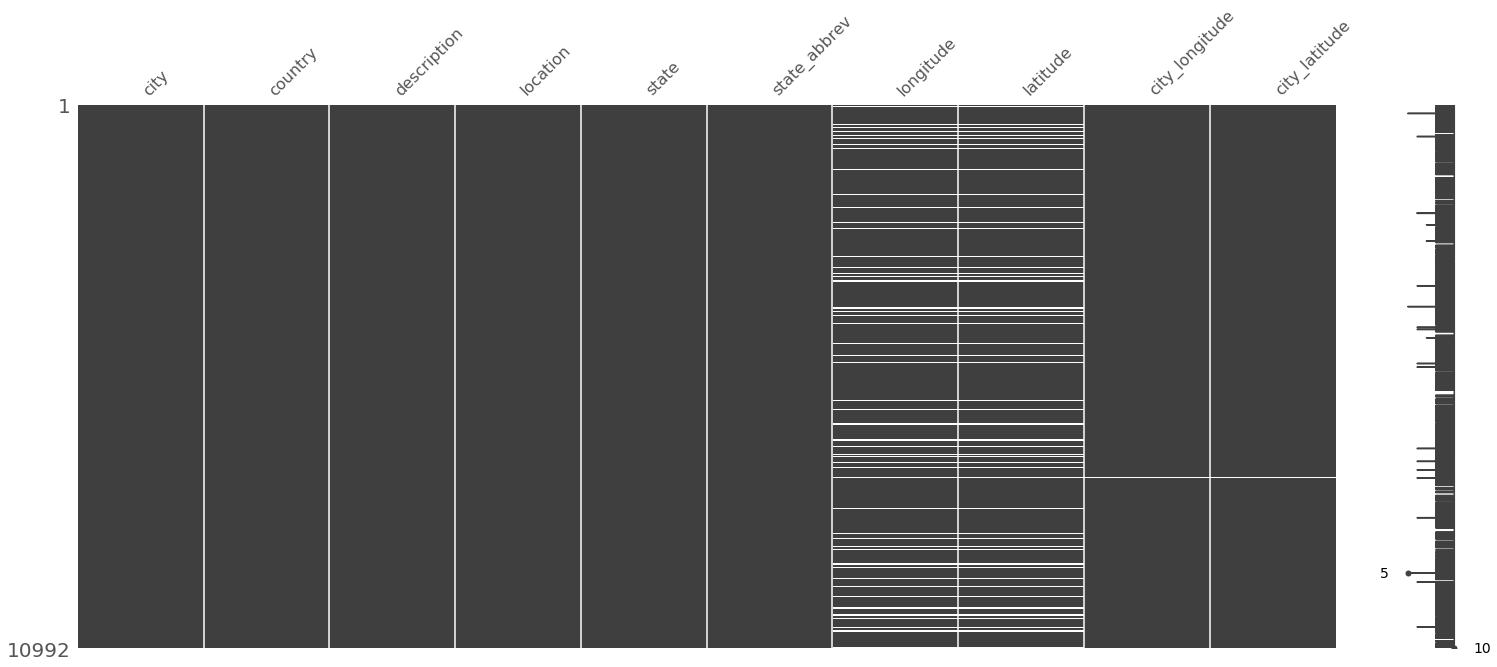

In [39]:
msno.matrix(haunt)

In [40]:
haunt['geometry'] = 'points'

In [41]:
haunt.head()

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude,geometry
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727,points
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434,points
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547,points
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547,points
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097,points


In [42]:
haunt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10989 non-null  object 
 1   country         10992 non-null  object 
 2   description     10992 non-null  object 
 3   location        10989 non-null  object 
 4   state           10992 non-null  object 
 5   state_abbrev    10992 non-null  object 
 6   longitude       9731 non-null   float64
 7   latitude        9731 non-null   float64
 8   city_longitude  10963 non-null  float64
 9   city_latitude   10963 non-null  float64
 10  geometry        10992 non-null  object 
dtypes: float64(4), object(7)
memory usage: 644.1+ KB


In [43]:
haunt.to_csv('haunt.csv', index= False)

### Things to Check
* Types of Location Haunting (Frequent Words in Locations)
* Types of Ghosts (Find out the most common by classification)

In [44]:
haunt_lst = [ str(i) for i in haunt['location']]

In [45]:
import collections
words = haunt_lst
counter = collections.Counter(words)
print(counter.most_common(10))



[('Prince Georges county', 18), ('Cemetery', 13), ('Cry Baby Bridge', 13), ('Wal-Mart', 12), ('Mission Inn', 12), ('Oviedo', 12), ('Gravity Hill', 11), ('Fordham University', 11), ('University of Vermont', 11), ('Wentworth Military Academy', 11)]


In [46]:
from nltk import sent_tokenize, word_tokenize, regexp_tokenize, FreqDist
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from wordcloud import WordCloud, STOPWORDS

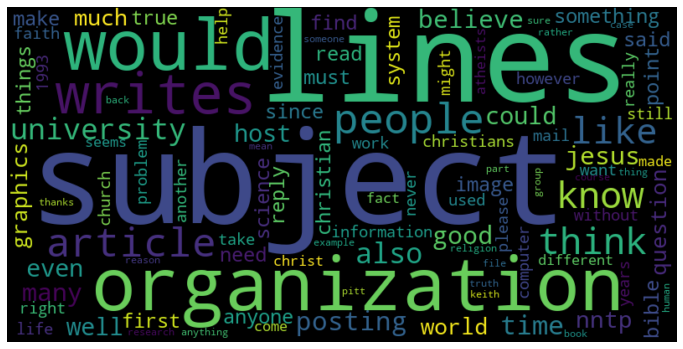

In [47]:

def tokenize(text, pat='(?u)\\b\\w\\w+\\b', stop_words='english', min_len=2):
    if stop_words:
        stop = set(stopwords.words(stop_words))
    return [w
            for w in regexp_tokenize(text.casefold(), pat)
            if w not in stop and len(w) >= min_len]

def get_data():
    categories = ['alt.atheism', 'soc.religion.christian',
                  'comp.graphics', 'sci.med']
    twenty_train = \
        fetch_20newsgroups(subset='train',
                           categories=categories, shuffle=True)
    twenty_test = \
        fetch_20newsgroups(subset='test',
                           categories=categories, shuffle=True)
    X_train = pd.DataFrame(twenty_train.data, columns=['text'])
    X_test = pd.DataFrame(twenty_test.data, columns=['text'])
    return X_train, X_test, twenty_train.target, twenty_test.target

X_train, X_test, y_train, y_test = get_data()

words = tokenize(X_train.text.str.cat(sep=' '), min_len=4)

fdist = FreqDist(words)

wc = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(fdist)

plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('d:/temp/result.png')

In [130]:
exclude_lst = ['the', 'The', 'of', "'S'", 'Old', 'St.', 'te', "'s", '.', 'and','hol']

for words in exclude_lst:
    haunt['location']=haunt['location'].str.replace(words,'')

In [128]:
display(haunt['location'])

0                       Ada Cemery
1                   North Adams Rd
2                    Ghost Trestle
3         Siena Heights University
4                   Albion College
                   ...            
10987                    city hall
10988                 Pillar  Fire
10989     Ridge Mental Institution
10990    Wheat Ridge Middle School
10991           Saylor Park Forest
Name: location, Length: 10992, dtype: object

In [129]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('punkt')

top_N = 15

#df = pd.read_csv('haunt.csv',
#                 usecols=['location'])

txt = haunt.location.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('of')

words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 


print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Makoto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


All frequencies, including STOPWORDS:
          Word  Frequency
0       school       1210
1       cemery        743
2         high        698
3   university        500
4        house        499
5         road        429
6      college        372
7         park        347
8          inn        278
9          hol        250
10      bridge        247
11    hospital        217
12        hill        207
13      middle        202
14  elementary        194


In [134]:
haunt

AttributeError: Can only use .str accessor with string values!

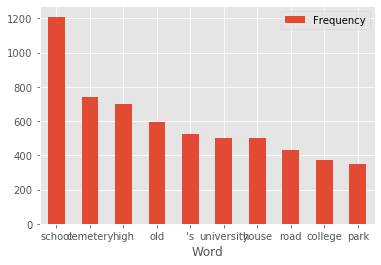

In [34]:
matplotlib.style.use('ggplot')

rslt.plot.bar(rot=0)

In [118]:
rslt

,Frequency
Word,
school,1210
cemery,743
high,698
's,523
university,500
house,499
road,429
college,372
park,347
